In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies



-- New Fold --
Train, test and validation arrays normalized to:
[1.], [1.0006], [0.9997]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (21285, 1, 32) 
Shape of train set: (72369, 1, 32) 
Shape of validation set: (12771, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.2, 0.21, 0.16] 
Fraction of train labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.025, loss_val=1.031, train=59.4%, val=59.2%
End of epoch 2: loss_tr=0.939, loss_val=0.952, train=63.7%, val=63.2%
End of epoch 3: loss_tr=0.920, loss_val=0.942, train=64.8%, val=64.2%
End of epoch 4: loss_tr=0.907, loss_val=0.929, train=64.6%, val=64.2%
End of epoch 5: loss_tr=0.880, loss_val=0.902, train=66.3%, val=65.4%
End of epoch 6: loss_tr=0.927, loss_val=0.945, train=63.2%, val=63.0%
End 

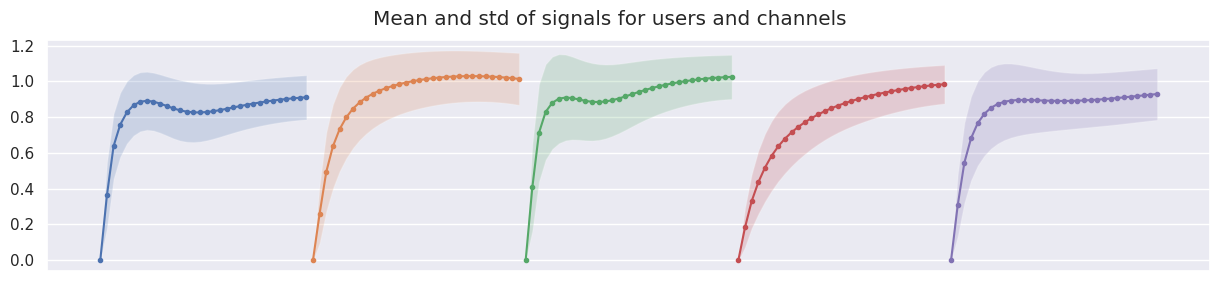

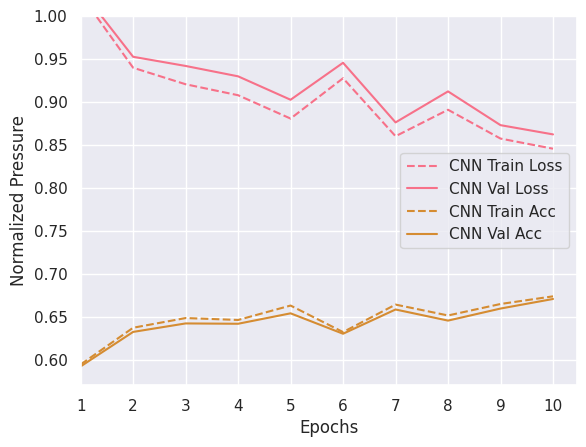

In [1]:
from peratouch.data import Data, load_data
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import CNN
from peratouch.config import path_five_users_main, path_five_users_first
import sklearn

Xraw, yraw = load_data(path_five_users_main)
# Shuffle data to destroy ordering of users
Xraw, yraw = sklearn.utils.shuffle(Xraw, yraw, random_state=42)

D = Data(Xraw, yraw)
# Create indices of several folds
n_folds = 5
D.make_folds(n_folds)     # Makes indices available inside class

predictions = []
actual_vals = []

n_runs = 1
for f in range(n_runs):
    D.next_fold()
    D.normalize()
    D.tensors_to_device()
    D.print_shapes()
    D.plot_data()
    model = CNN(n_ch=1)      # Initialize new model each fold
    T = Trainer(D)
    T.setup(model, max_epochs=10, batch_size=int(len(D.xtr)/20))       # 20 minibatches
    T.train_model(model)
    T.plot_train()
    R = Results(D, model)
    preds, actual = R.get_preds_actual()
    # R.test_metrics(report=True, conf_matrix=False)
    # R.find_most_uncertain_preds()

    predictions.extend(preds)
    actual_vals.extend(actual)

print(sklearn.metrics.classification_report(actual_vals, predictions))

In [2]:
# Look at 3 channels
from peratouch.data import Data, load_data
from peratouch.trainer import Trainer  
from peratouch.networks import CNN 
from peratouch.config import path_five_users_main, path_five_users_first
from peratouch.results import Results
import sklearn

Xraw, yraw = load_data(path_five_users_main)

D = Data(Xraw, yraw)
D.group_presses()
D.shuffle()
D.make_folds(5)
D.next_fold()
D.normalize()
# D.resample_presses()
D.tensors_to_device()
D.print_shapes()



-- New Fold --
Train, test and validation arrays normalized to:
[1. 1. 1.], [0.999  1.     1.0007], [1.001  0.9996 1.0003]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106410, 3, 32) 
Labels shape:  (106410,) 
Shape of test set: (21282, 3, 32) 
Shape of train set: (72358, 3, 32) 
Shape of validation set: (12770, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.2, 0.21, 0.16] 
Fraction of train labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32


In [ ]:
# Did not see any improvement by trying out CNN_Dense
model = CNN(input_ch=3) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=20, batch_size=5000)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()